In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel
from sklearn import linear_model
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score

from sklearn.utils import resample
from sklearn.metrics import mean_squared_error, r2_score

#Calculo la precisión del modelo
from sklearn.metrics import precision_score
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score
#Calculo el Puntaje del modelo
from sklearn.metrics import f1_score
#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasRegressor
from keras.activations import relu, sigmoid
from keras.layers import Dense, Activation
from keras.models import Sequential

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.decomposition import PCA
import joblib

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

### 3. Selección de Variables

In [2]:
X_train = pd.read_csv("preprocess_data/prep_Xtrain.csv")
X_test = pd.read_csv("preprocess_data/prep_Xtest.csv")

In [3]:
X_train.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes
0,0.284869,0.238095,0.75,0.4,0.058037,0.5,0.5,0.680107,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947689,0.545455
1,0.692502,0.085714,0.75,0.2,0.045415,0.5,0.0,0.098792,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.921163,0.181818
2,0.842721,0.123810,1.00,0.4,0.054810,0.5,0.0,0.114815,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784346,0.727273
3,0.713414,0.485714,0.75,0.0,0.113886,0.0,0.0,0.893001,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190604,0.181818
4,0.328546,0.142857,1.00,0.2,0.102729,0.0,0.0,0.636433,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839964,0.818182


In [4]:
X_train

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes
0,0.284869,0.238095,0.75,0.4,0.058037,0.5,0.5,0.680107,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947689,0.545455
1,0.692502,0.085714,0.75,0.2,0.045415,0.5,0.0,0.098792,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.921163,0.181818
2,0.842721,0.123810,1.00,0.4,0.054810,0.5,0.0,0.114815,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.784346,0.727273
3,0.713414,0.485714,0.75,0.0,0.113886,0.0,0.0,0.893001,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.190604,0.181818
4,0.328546,0.142857,1.00,0.2,0.102729,0.0,0.0,0.636433,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.839964,0.818182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1787,0.401534,0.209524,0.75,0.2,0.104660,0.0,0.5,0.418418,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053703,0.363636
1788,0.445881,0.247619,0.75,0.4,0.093173,0.0,0.5,0.697290,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.867313,0.909091
1789,0.969224,0.161905,0.75,0.4,0.008678,0.0,0.5,0.697290,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947689,0.636364
1790,0.228171,0.095238,0.00,0.4,0.028115,0.5,0.0,0.098792,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.947689,0.818182


In [5]:
X_test

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,dia,mes
0,0.471020,0.247619,0.75,0.0,0.038368,0.5,0.0,0.045197,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.415359,0.909091
1,0.665113,0.180952,0.75,0.4,0.047086,0.5,0.0,0.082004,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.345063,0.727273
2,0.259523,0.285714,1.00,0.2,0.092116,0.0,0.0,0.310416,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.608797,0.181818
3,0.969289,0.495238,0.75,0.4,0.102303,0.0,0.0,0.332958,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.053703,0.818182
4,0.754512,0.314286,0.75,0.4,0.071234,0.5,0.5,0.239001,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.812313,0.727273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,0.076964,0.333333,1.00,0.2,0.092659,0.0,0.5,0.582534,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.578017,0.818182
444,0.336897,0.409524,0.75,0.6,0.105786,0.0,0.5,0.082004,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.514853,0.090909
445,0.931446,0.371429,0.75,0.2,0.078574,0.0,0.5,0.310416,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.308430,0.454545
446,0.731699,0.133333,0.75,0.0,0.150751,0.0,0.0,0.764546,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.449236,0.181818


In [6]:
y_train = pd.read_csv("preprocess_data/prep_ytrain.csv")
y_test = pd.read_csv("preprocess_data/prep_ytest.csv")

y_train.head()

,NumWebPurchases
0,3
1,3
2,3
3,2
4,4


In [7]:
y_test.head()

,NumWebPurchases
0,2
1,2
2,4
3,3
4,4


In [8]:
# creacion de listas para almacenar valores
listamse = []
listar2s = []


In [9]:
listaCol = ['Red 0', 'Red 1', 'Red 2', 'Red 3', 'Red 4', 'Red 5', 'Red 6', 'Red 7', 'Red 8', 'Red 9', 'Red 10', 'Red 11','Reg Lineal']

In [10]:
# Estructura de la red
clasificador0 = Sequential()

clasificador0.add(Dense(input_dim=29, kernel_initializer="uniform", units=20, activation='relu'))

clasificador0.add(Dense(kernel_initializer="uniform", units=18, activation='relu'))

clasificador0.add(Dense(units=1, kernel_initializer="uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador0.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador0.fit(X_train, y_train, batch_size=30, epochs=500)

Epoch 1/500
60/60 [==============================] - 11s 3ms/step - loss: 22.8622 - MSE: 22.8622
Epoch 2/500
60/60 [==============================] - 0s 2ms/step - loss: 10.0749 - MSE: 10.0749
Epoch 3/500
60/60 [==============================] - 0s 3ms/step - loss: 6.9289 - MSE: 6.9289
Epoch 4/500
60/60 [==============================] - 0s 4ms/step - loss: 6.7066 - MSE: 6.7066
Epoch 5/500
60/60 [==============================] - ETA: 0s - loss: 6.7919 - MSE: 6.791 - 0s 1ms/step - loss: 6.4376 - MSE: 6.4376
Epoch 6/500
60/60 [==============================] - 0s 3ms/step - loss: 6.1612 - MSE: 6.1612
Epoch 7/500
60/60 [==============================] - 0s 5ms/step - loss: 5.9058 - MSE: 5.9058
Epoch 8/500
60/60 [==============================] - 0s 2ms/step - loss: 5.7037 - MSE: 5.7037
Epoch 9/500
60/60 [==============================] - 0s 3ms/step - loss: 5.5499 - MSE: 5.5499
Epoch 10/500
60/60 [==============================] - 0s 2ms/step - loss: 5.4384 - MSE: 5.4384
Epoch 11/500
60/

60/60 [==============================] - 0s 1ms/step - loss: 3.9027 - MSE: 3.9027
Epoch 87/500
60/60 [==============================] - 0s 805us/step - loss: 3.8673 - MSE: 3.8673
Epoch 88/500
60/60 [==============================] - 0s 896us/step - loss: 3.8904 - MSE: 3.8904
Epoch 89/500
60/60 [==============================] - 0s 778us/step - loss: 3.8660 - MSE: 3.8660
Epoch 90/500
60/60 [==============================] - 0s 2ms/step - loss: 3.8870 - MSE: 3.8870
Epoch 91/500
60/60 [==============================] - 0s 1ms/step - loss: 3.8635 - MSE: 3.8635
Epoch 92/500
60/60 [==============================] - 0s 2ms/step - loss: 3.8468 - MSE: 3.8468
Epoch 93/500
60/60 [==============================] - 0s 2ms/step - loss: 3.8261 - MSE: 3.8261
Epoch 94/500
60/60 [==============================] - 0s 2ms/step - loss: 3.8203 - MSE: 3.8203
Epoch 95/500
60/60 [==============================] - 0s 2ms/step - loss: 3.8132 - MSE: 3.8132
Epoch 96/500
60/60 [==============================] - 0s 

60/60 [==============================] - 0s 1ms/step - loss: 3.5959 - MSE: 3.5959
Epoch 172/500
60/60 [==============================] - 0s 1ms/step - loss: 3.5852 - MSE: 3.5852
Epoch 173/500
60/60 [==============================] - 0s 794us/step - loss: 3.5850 - MSE: 3.5850
Epoch 174/500
60/60 [==============================] - 0s 794us/step - loss: 3.5786 - MSE: 3.5786
Epoch 175/500
60/60 [==============================] - 0s 2ms/step - loss: 3.6872 - MSE: 3.6872
Epoch 176/500
60/60 [==============================] - 0s 947us/step - loss: 3.5883 - MSE: 3.5883
Epoch 177/500
60/60 [==============================] - 0s 1ms/step - loss: 3.5715 - MSE: 3.5715
Epoch 178/500
60/60 [==============================] - 0s 1ms/step - loss: 3.5803 - MSE: 3.5803
Epoch 179/500
60/60 [==============================] - 0s 778us/step - loss: 3.5608 - MSE: 3.5608
Epoch 180/500
60/60 [==============================] - 0s 1ms/step - loss: 3.5683 - MSE: 3.5683
Epoch 181/500
60/60 [=========================

60/60 [==============================] - 0s 727us/step - loss: 3.4348 - MSE: 3.4348
Epoch 256/500
60/60 [==============================] - 0s 693us/step - loss: 3.4260 - MSE: 3.4260
Epoch 257/500
60/60 [==============================] - 0s 1ms/step - loss: 3.4435 - MSE: 3.4435
Epoch 258/500
60/60 [==============================] - 0s 727us/step - loss: 3.4444 - MSE: 3.4444
Epoch 259/500
60/60 [==============================] - 0s 778us/step - loss: 3.4406 - MSE: 3.4406
Epoch 260/500
60/60 [==============================] - 0s 761us/step - loss: 3.4427 - MSE: 3.4427
Epoch 261/500
60/60 [==============================] - 0s 727us/step - loss: 3.4144 - MSE: 3.4144
Epoch 262/500
60/60 [==============================] - 0s 1ms/step - loss: 3.4290 - MSE: 3.4290
Epoch 263/500
60/60 [==============================] - 0s 1ms/step - loss: 3.4445 - MSE: 3.4445
Epoch 264/500
60/60 [==============================] - 0s 1ms/step - loss: 3.4412 - MSE: 3.4412
Epoch 265/500
60/60 [=====================

60/60 [==============================] - 0s 2ms/step - loss: 3.3241 - MSE: 3.3241
Epoch 340/500
60/60 [==============================] - 0s 3ms/step - loss: 3.3252 - MSE: 3.3252
Epoch 341/500
60/60 [==============================] - 0s 2ms/step - loss: 3.3499 - MSE: 3.3499
Epoch 342/500
60/60 [==============================] - 0s 1ms/step - loss: 3.3135 - MSE: 3.3135
Epoch 343/500
60/60 [==============================] - 0s 1ms/step - loss: 3.3356 - MSE: 3.3356
Epoch 344/500
60/60 [==============================] - 0s 744us/step - loss: 3.3316 - MSE: 3.3316
Epoch 345/500
60/60 [==============================] - 0s 794us/step - loss: 3.3071 - MSE: 3.3071
Epoch 346/500
60/60 [==============================] - 0s 845us/step - loss: 3.3209 - MSE: 3.3209
Epoch 347/500
60/60 [==============================] - 0s 963us/step - loss: 3.3116 - MSE: 3.3116
Epoch 348/500
60/60 [==============================] - 0s 1ms/step - loss: 3.3330 - MSE: 3.3330
Epoch 349/500
60/60 [=========================

60/60 [==============================] - 0s 744us/step - loss: 3.1526 - MSE: 3.1526
Epoch 424/500
60/60 [==============================] - 0s 744us/step - loss: 3.1483 - MSE: 3.1483
Epoch 425/500
60/60 [==============================] - 0s 1ms/step - loss: 3.1498 - MSE: 3.1498
Epoch 426/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1467 - MSE: 3.1467
Epoch 427/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1429 - MSE: 3.1429
Epoch 428/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1719 - MSE: 3.1719
Epoch 429/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1441 - MSE: 3.1441
Epoch 430/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1677 - MSE: 3.1677
Epoch 431/500
60/60 [==============================] - 0s 2ms/step - loss: 3.1462 - MSE: 3.1462
Epoch 432/500
60/60 [==============================] - 0s 896us/step - loss: 3.2040 - MSE: 3.2040
Epoch 433/500
60/60 [===========================

In [11]:
y_preds = clasificador0.predict(X_test)
y_preds

array([[ 2.9385703 ],
       [ 2.4868393 ],
       [ 5.4788175 ],
       [ 3.7519355 ],
       [ 3.8410916 ],
       [ 5.374685  ],
       [ 7.948562  ],
       [ 8.588487  ],
       [ 3.6628008 ],
       [ 3.242285  ],
       [ 3.3998044 ],
       [ 5.6422153 ],
       [ 2.4150362 ],
       [ 1.9754786 ],
       [ 6.6428905 ],
       [ 1.8771482 ],
       [ 2.2607865 ],
       [ 5.4342427 ],
       [ 2.9239993 ],
       [ 4.7230024 ],
       [ 1.9499784 ],
       [ 3.296276  ],
       [ 6.6190763 ],
       [ 7.1867275 ],
       [ 5.678391  ],
       [ 4.0120845 ],
       [ 3.3789794 ],
       [ 1.6986375 ],
       [ 5.2220106 ],
       [ 5.1072674 ],
       [ 5.92689   ],
       [ 4.010824  ],
       [ 6.3764167 ],
       [ 4.235359  ],
       [ 7.4006085 ],
       [ 7.375046  ],
       [ 8.216019  ],
       [ 6.5461187 ],
       [ 7.073273  ],
       [ 4.3592324 ],
       [ 1.9252391 ],
       [ 3.8256955 ],
       [ 3.2755976 ],
       [ 3.7629323 ],
       [ 6.6994257 ],
       [ 2

In [12]:
r2_score(y_test, y_preds)

0.6044099164142395

In [13]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.7310486534748426
r2s: 0.6044099164142395


In [14]:
clasificador1 = Sequential()

clasificador1.add(Dense(input_dim=29, kernel_initializer="uniform", units=25, activation='relu'))

clasificador1.add(Dense(kernel_initializer="uniform", units=20, activation='relu'))

clasificador1.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador1.add(Dense(kernel_initializer="uniform", units=7, activation='relu'))

clasificador1.add(Dense(units=1, kernel_initializer="uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador1.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador1.fit(X_train, y_train, batch_size=10, epochs=500)

Epoch 1/500
180/180 [==============================] - 1s 1ms/step - loss: 16.1254 - MSE: 16.1254
Epoch 2/500
180/180 [==============================] - 0s 1ms/step - loss: 6.8367 - MSE: 6.8367
Epoch 3/500
180/180 [==============================] - 0s 2ms/step - loss: 6.4783 - MSE: 6.4783
Epoch 4/500
180/180 [==============================] - 0s 1ms/step - loss: 6.1247 - MSE: 6.1247
Epoch 5/500
180/180 [==============================] - 0s 2ms/step - loss: 5.8093 - MSE: 5.8093
Epoch 6/500
180/180 [==============================] - 0s 1ms/step - loss: 5.5710 - MSE: 5.5710
Epoch 7/500
180/180 [==============================] - 0s 1ms/step - loss: 5.3994 - MSE: 5.3994
Epoch 8/500
180/180 [==============================] - 0s 1ms/step - loss: 5.3284 - MSE: 5.3284
Epoch 9/500
180/180 [==============================] - 0s 1ms/step - loss: 5.2738 - MSE: 5.2738
Epoch 10/500
180/180 [==============================] - 0s 2ms/step - loss: 5.2311 - MSE: 5.2311
Epoch 11/500
180/180 [===============

180/180 [==============================] - 0s 1ms/step - loss: 4.6188 - MSE: 4.6188
Epoch 86/500
180/180 [==============================] - 0s 942us/step - loss: 4.5840 - MSE: 4.5840
Epoch 87/500
180/180 [==============================] - 0s 1ms/step - loss: 4.6027 - MSE: 4.6027
Epoch 88/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5849 - MSE: 4.5849
Epoch 89/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5774 - MSE: 4.5774
Epoch 90/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5959 - MSE: 4.5959
Epoch 91/500
180/180 [==============================] - 0s 1ms/step - loss: 4.6183 - MSE: 4.6183
Epoch 92/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5887 - MSE: 4.5887
Epoch 93/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5655 - MSE: 4.5655
Epoch 94/500
180/180 [==============================] - 0s 1ms/step - loss: 4.5850 - MSE: 4.5850
Epoch 95/500
180/180 [===================

180/180 [==============================] - 0s 2ms/step - loss: 4.4166 - MSE: 4.4166
Epoch 169/500
180/180 [==============================] - 0s 2ms/step - loss: 4.3966 - MSE: 4.3966
Epoch 170/500
180/180 [==============================] - 0s 2ms/step - loss: 4.3782 - MSE: 4.3782
Epoch 171/500
180/180 [==============================] - 0s 2ms/step - loss: 4.3594 - MSE: 4.3594
Epoch 172/500
180/180 [==============================] - 0s 1ms/step - loss: 4.3548 - MSE: 4.3548
Epoch 173/500
180/180 [==============================] - 0s 1ms/step - loss: 4.3453 - MSE: 4.3453
Epoch 174/500
180/180 [==============================] - 0s 1ms/step - loss: 4.3444 - MSE: 4.3444
Epoch 175/500
180/180 [==============================] - 0s 953us/step - loss: 4.3259 - MSE: 4.3259
Epoch 176/500
180/180 [==============================] - 0s 908us/step - loss: 4.3636 - MSE: 4.3636
Epoch 177/500
180/180 [==============================] - 0s 1ms/step - loss: 4.3668 - MSE: 4.3668
Epoch 178/500
180/180 [=======

180/180 [==============================] - 0s 1ms/step - loss: 3.9743 - MSE: 3.9743
Epoch 252/500
180/180 [==============================] - 0s 2ms/step - loss: 3.9375 - MSE: 3.9375
Epoch 253/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9777 - MSE: 3.9777
Epoch 254/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9259 - MSE: 3.9259
Epoch 255/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9794 - MSE: 3.9794
Epoch 256/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9607 - MSE: 3.9607
Epoch 257/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9550 - MSE: 3.9550
Epoch 258/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9216 - MSE: 3.9216
Epoch 259/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9451 - MSE: 3.9451
Epoch 260/500
180/180 [==============================] - 0s 1ms/step - loss: 3.9131 - MSE: 3.9131
Epoch 261/500
180/180 [===========

180/180 [==============================] - 0s 2ms/step - loss: 3.6584 - MSE: 3.6584
Epoch 334/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6468 - MSE: 3.6468
Epoch 335/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6784 - MSE: 3.6784
Epoch 336/500
180/180 [==============================] - 1s 3ms/step - loss: 3.7068 - MSE: 3.7068
Epoch 337/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6809 - MSE: 3.6809
Epoch 338/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6625 - MSE: 3.6625
Epoch 339/500
180/180 [==============================] - 0s 2ms/step - loss: 3.7249 - MSE: 3.7249
Epoch 340/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6595 - MSE: 3.6595
Epoch 341/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6371 - MSE: 3.6371
Epoch 342/500
180/180 [==============================] - 0s 2ms/step - loss: 3.6887 - MSE: 3.6887
Epoch 343/500
180/180 [===========

180/180 [==============================] - 0s 1ms/step - loss: 3.4731 - MSE: 3.4731
Epoch 417/500
180/180 [==============================] - 0s 2ms/step - loss: 3.3360 - MSE: 3.3360
Epoch 418/500
180/180 [==============================] - 0s 1ms/step - loss: 3.2981 - MSE: 3.2981
Epoch 419/500
180/180 [==============================] - 0s 1ms/step - loss: 3.3401 - MSE: 3.3401
Epoch 420/500
180/180 [==============================] - 0s 2ms/step - loss: 3.3178 - MSE: 3.3178
Epoch 421/500
180/180 [==============================] - 0s 2ms/step - loss: 3.3224 - MSE: 3.3224
Epoch 422/500
180/180 [==============================] - 0s 2ms/step - loss: 3.3504 - MSE: 3.3504
Epoch 423/500
180/180 [==============================] - 0s 2ms/step - loss: 3.2879 - MSE: 3.2879
Epoch 424/500
180/180 [==============================] - 0s 2ms/step - loss: 3.2566 - MSE: 3.2566
Epoch 425/500
180/180 [==============================] - 0s 2ms/step - loss: 3.2718 - MSE: 3.2718
Epoch 426/500
180/180 [===========

180/180 [==============================] - 0s 2ms/step - loss: 2.6909 - MSE: 2.6909
Epoch 500/500
180/180 [==============================] - 0s 1ms/step - loss: 2.6873 - MSE: 2.6873


In [15]:
y_preds = clasificador1.predict(X_test)
y_preds

array([[ 2.4179053 ],
       [ 1.9350852 ],
       [ 4.979158  ],
       [ 3.8669991 ],
       [ 4.0846314 ],
       [ 4.5018344 ],
       [ 6.926679  ],
       [ 8.572517  ],
       [ 3.8852525 ],
       [ 5.720507  ],
       [ 2.752327  ],
       [ 4.567462  ],
       [ 1.7511314 ],
       [ 2.9239445 ],
       [ 8.926503  ],
       [ 2.9540548 ],
       [ 2.2057056 ],
       [ 4.239415  ],
       [ 2.7539678 ],
       [ 4.3222013 ],
       [ 1.6999677 ],
       [ 3.7905154 ],
       [ 2.4295855 ],
       [ 6.674788  ],
       [ 5.7182574 ],
       [ 3.429132  ],
       [ 5.661254  ],
       [ 1.0576099 ],
       [ 4.1995087 ],
       [ 5.728335  ],
       [ 5.7331386 ],
       [ 4.9592605 ],
       [ 5.792736  ],
       [ 3.958706  ],
       [ 8.566876  ],
       [ 5.6564956 ],
       [ 8.223584  ],
       [ 1.266873  ],
       [ 3.308247  ],
       [ 4.5920677 ],
       [ 2.3371763 ],
       [ 2.3025885 ],
       [ 3.958869  ],
       [ 4.026756  ],
       [ 4.407106  ],
       [-0

In [16]:
r2_score(y_test, y_preds)

0.4095088482339868

In [17]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 4.076593756602011
r2s: 0.4095088482339868


In [18]:
clasificador2 = Sequential()

clasificador2.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=16, activation='relu'))

clasificador2.add(Dense(kernel_initializer="he_uniform", units=11, activation='relu'))

clasificador2.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador2.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador2.fit(X_train, y_train, batch_size=15, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 2ms/step - loss: 13.1681 - MSE: 13.1681
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 7.1317 - MSE: 7.1317
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 6.6980 - MSE: 6.6980
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 6.3518 - MSE: 6.3518
Epoch 5/100
120/120 [==============================] - 0s 964us/step - loss: 6.0493 - MSE: 6.0493
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 5.7831 - MSE: 5.7831
Epoch 7/100
120/120 [==============================] - 0s 922us/step - loss: 5.5714 - MSE: 5.5714 0s - loss: 5.5827 - MSE: 5.582
Epoch 8/100
120/120 [==============================] - 0s 947us/step - loss: 5.4215 - MSE: 5.4215
Epoch 9/100
120/120 [==============================] - 0s 947us/step - loss: 5.3355 - MSE: 5.3355
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 5.2519 - MSE: 5.251

120/120 [==============================] - 0s 947us/step - loss: 3.4508 - MSE: 3.4508
Epoch 85/100
120/120 [==============================] - 0s 846us/step - loss: 3.4695 - MSE: 3.4695
Epoch 86/100
120/120 [==============================] - 0s 729us/step - loss: 3.4439 - MSE: 3.4439
Epoch 87/100
120/120 [==============================] - 0s 955us/step - loss: 3.3909 - MSE: 3.3909
Epoch 88/100
120/120 [==============================] - 0s 943us/step - loss: 3.3936 - MSE: 3.3936
Epoch 89/100
120/120 [==============================] - 0s 721us/step - loss: 3.3620 - MSE: 3.3620
Epoch 90/100
120/120 [==============================] - 0s 1ms/step - loss: 3.3687 - MSE: 3.3687
Epoch 91/100
120/120 [==============================] - 0s 888us/step - loss: 3.3472 - MSE: 3.3472
Epoch 92/100
120/120 [==============================] - 0s 792us/step - loss: 3.3309 - MSE: 3.3309
Epoch 93/100
120/120 [==============================] - 0s 986us/step - loss: 3.3030 - MSE: 3.3030
Epoch 94/100
120/120 [===

In [19]:
y_preds = clasificador2.predict(X_test)
y_preds


array([[ 2.968852  ],
       [ 2.2440345 ],
       [ 5.374118  ],
       [ 3.5576618 ],
       [ 4.4880457 ],
       [ 5.605032  ],
       [ 7.685248  ],
       [ 8.641249  ],
       [ 4.4032826 ],
       [ 3.3965824 ],
       [ 2.0808542 ],
       [ 5.2070985 ],
       [ 1.627401  ],
       [ 0.62184286],
       [ 6.3942733 ],
       [ 1.3900309 ],
       [ 2.0507145 ],
       [ 5.1927276 ],
       [ 2.9182856 ],
       [ 5.3128    ],
       [ 1.6876334 ],
       [ 1.1011564 ],
       [ 5.3413696 ],
       [ 7.159278  ],
       [ 5.626721  ],
       [ 4.305734  ],
       [ 3.5511515 ],
       [ 1.5494319 ],
       [ 4.2603636 ],
       [ 5.7818666 ],
       [ 6.8160114 ],
       [ 2.1357503 ],
       [ 5.6378303 ],
       [ 4.432641  ],
       [ 7.975276  ],
       [ 7.188043  ],
       [ 8.20424   ],
       [ 4.164299  ],
       [ 6.807049  ],
       [ 4.32458   ],
       [ 1.6956793 ],
       [ 3.6931775 ],
       [ 3.9912508 ],
       [ 3.2038224 ],
       [ 5.826093  ],
       [ 1

In [20]:
r2_score(y_test, y_preds)

0.6511871810663825

In [21]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.408110867766227
r2s: 0.6511871810663825


In [22]:
clasificador3 = Sequential()

clasificador3.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=14, activation='relu'))

clasificador3.add(Dense(kernel_initializer="he_uniform", units=9, activation='relu'))

clasificador3.add(Dense(kernel_initializer="he_uniform", units=7, activation='relu'))

clasificador3.add(Dense(kernel_initializer="he_uniform", units=13, activation='relu'))

clasificador3.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador3.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador3.fit(X_train, y_train, batch_size=20, epochs=200)


Epoch 1/200
90/90 [==============================] - 1s 959us/step - loss: 17.5748 - MSE: 17.5748
Epoch 2/200
90/90 [==============================] - 0s 1ms/step - loss: 7.2564 - MSE: 7.2564
Epoch 3/200
90/90 [==============================] - 0s 863us/step - loss: 6.6012 - MSE: 6.6012
Epoch 4/200
90/90 [==============================] - 0s 1ms/step - loss: 6.0712 - MSE: 6.0712
Epoch 5/200
90/90 [==============================] - 0s 919us/step - loss: 5.6300 - MSE: 5.6300
Epoch 6/200
90/90 [==============================] - 0s 1ms/step - loss: 5.3648 - MSE: 5.3648
Epoch 7/200
90/90 [==============================] - 0s 852us/step - loss: 5.1692 - MSE: 5.1692
Epoch 8/200
90/90 [==============================] - 0s 1ms/step - loss: 5.0123 - MSE: 5.0123
Epoch 9/200
90/90 [==============================] - 0s 1ms/step - loss: 4.8784 - MSE: 4.8784
Epoch 10/200
90/90 [==============================] - 0s 1ms/step - loss: 4.7925 - MSE: 4.7925
Epoch 11/200
90/90 [=============================

90/90 [==============================] - 0s 1ms/step - loss: 2.0183 - MSE: 2.0183
Epoch 87/200
90/90 [==============================] - 0s 997us/step - loss: 2.0490 - MSE: 2.0490
Epoch 88/200
90/90 [==============================] - 0s 2ms/step - loss: 2.0040 - MSE: 2.0040
Epoch 89/200
90/90 [==============================] - 0s 2ms/step - loss: 1.9839 - MSE: 1.9839
Epoch 90/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9677 - MSE: 1.9677
Epoch 91/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9610 - MSE: 1.9610
Epoch 92/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9179 - MSE: 1.9179
Epoch 93/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9400 - MSE: 1.9400
Epoch 94/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9409 - MSE: 1.9409
Epoch 95/200
90/90 [==============================] - 0s 1ms/step - loss: 1.9260 - MSE: 1.9260
Epoch 96/200
90/90 [==============================] - 0s 1ms/

90/90 [==============================] - 0s 818us/step - loss: 1.5703 - MSE: 1.5703
Epoch 171/200
90/90 [==============================] - 0s 840us/step - loss: 1.6008 - MSE: 1.6008
Epoch 172/200
90/90 [==============================] - 0s 796us/step - loss: 1.6145 - MSE: 1.6145
Epoch 173/200
90/90 [==============================] - 0s 797us/step - loss: 1.5944 - MSE: 1.5944
Epoch 174/200
90/90 [==============================] - 0s 796us/step - loss: 1.5416 - MSE: 1.5416
Epoch 175/200
90/90 [==============================] - 0s 796us/step - loss: 1.5538 - MSE: 1.5538
Epoch 176/200
90/90 [==============================] - 0s 919us/step - loss: 1.5640 - MSE: 1.5640
Epoch 177/200
90/90 [==============================] - 0s 784us/step - loss: 1.5688 - MSE: 1.5688
Epoch 178/200
90/90 [==============================] - 0s 796us/step - loss: 1.5611 - MSE: 1.5611
Epoch 179/200
90/90 [==============================] - 0s 829us/step - loss: 1.5770 - MSE: 1.5770
Epoch 180/200
90/90 [=============

In [23]:
y_preds = clasificador3.predict(X_test)
y_preds

array([[ 2.3201354 ],
       [ 1.4546173 ],
       [ 5.008281  ],
       [ 3.6749778 ],
       [ 3.622461  ],
       [ 5.3979793 ],
       [ 8.043643  ],
       [ 9.294501  ],
       [ 3.3824742 ],
       [ 3.2882774 ],
       [ 1.6834493 ],
       [ 2.7296894 ],
       [ 1.6475924 ],
       [ 1.6480554 ],
       [ 5.853641  ],
       [ 0.9983076 ],
       [ 1.5016288 ],
       [ 4.8928185 ],
       [ 2.462825  ],
       [ 3.0061224 ],
       [ 1.1585087 ],
       [ 0.9920474 ],
       [ 6.127978  ],
       [ 6.115093  ],
       [ 4.94935   ],
       [ 3.1686609 ],
       [ 4.2506685 ],
       [ 1.2604119 ],
       [ 3.4877934 ],
       [ 5.916052  ],
       [ 6.3105097 ],
       [ 1.8364131 ],
       [ 6.3413563 ],
       [ 3.2178655 ],
       [ 5.1997294 ],
       [ 7.6629386 ],
       [ 8.153449  ],
       [ 4.932401  ],
       [ 5.8533535 ],
       [ 4.248939  ],
       [ 1.1373135 ],
       [ 3.5101268 ],
       [ 1.6652558 ],
       [ 3.0193975 ],
       [ 6.098774  ],
       [ 0

In [24]:
r2_score(y_test, y_preds)


0.5329246001750736

In [25]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 3.224564251460941
r2s: 0.5329246001750736


In [26]:
clasificador4 = Sequential()

clasificador4.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=22, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=18, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=15, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=9, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=12, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=6, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=18, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=15, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=9, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=12, activation='relu'))

clasificador4.add(Dense(kernel_initializer="he_uniform", units=6, activation='relu'))

clasificador4.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador4.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador4.fit(X_train, y_train, batch_size=10, epochs=500)


Epoch 1/500
180/180 [==============================] - 1s 2ms/step - loss: 7.8015 - MSE: 7.8015
Epoch 2/500
180/180 [==============================] - 0s 2ms/step - loss: 5.8732 - MSE: 5.8732
Epoch 3/500
180/180 [==============================] - 0s 2ms/step - loss: 5.4526 - MSE: 5.4526
Epoch 4/500
180/180 [==============================] - 0s 2ms/step - loss: 5.1796 - MSE: 5.1796A: 0s - loss: 3.7778 - MSE: 3
Epoch 5/500
180/180 [==============================] - 0s 2ms/step - loss: 4.9858 - MSE: 4.9858
Epoch 6/500
180/180 [==============================] - 0s 2ms/step - loss: 4.9407 - MSE: 4.9407
Epoch 7/500
180/180 [==============================] - 0s 2ms/step - loss: 4.7259 - MSE: 4.7259
Epoch 8/500
180/180 [==============================] - 0s 2ms/step - loss: 4.5980 - MSE: 4.5980
Epoch 9/500
180/180 [==============================] - 0s 2ms/step - loss: 4.5232 - MSE: 4.5232
Epoch 10/500
180/180 [==============================] - 0s 2ms/step - loss: 4.4000 - MSE: 4.4000
Epoch 11/5

180/180 [==============================] - 0s 2ms/step - loss: 1.4383 - MSE: 1.4383
Epoch 86/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4068 - MSE: 1.4068
Epoch 87/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4316 - MSE: 1.4316
Epoch 88/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4655 - MSE: 1.4655
Epoch 89/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4427 - MSE: 1.4427
Epoch 90/500
180/180 [==============================] - 0s 2ms/step - loss: 1.5089 - MSE: 1.5089
Epoch 91/500
180/180 [==============================] - 0s 2ms/step - loss: 1.3694 - MSE: 1.3694
Epoch 92/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4667 - MSE: 1.4667
Epoch 93/500
180/180 [==============================] - 0s 2ms/step - loss: 1.4398 - MSE: 1.4398
Epoch 94/500
180/180 [==============================] - 0s 2ms/step - loss: 1.3433 - MSE: 1.3433
Epoch 95/500
180/180 [=====================

180/180 [==============================] - 0s 2ms/step - loss: 1.0539 - MSE: 1.0539
Epoch 169/500
180/180 [==============================] - 0s 1ms/step - loss: 1.0875 - MSE: 1.0875
Epoch 170/500
180/180 [==============================] - 0s 1ms/step - loss: 1.0473 - MSE: 1.0473
Epoch 171/500
180/180 [==============================] - 0s 1ms/step - loss: 1.0876 - MSE: 1.0876
Epoch 172/500
180/180 [==============================] - 0s 2ms/step - loss: 1.2525 - MSE: 1.2525
Epoch 173/500
180/180 [==============================] - 0s 1ms/step - loss: 1.0381 - MSE: 1.0381
Epoch 174/500
180/180 [==============================] - 0s 3ms/step - loss: 1.0634 - MSE: 1.0634
Epoch 175/500
180/180 [==============================] - 0s 2ms/step - loss: 1.0369 - MSE: 1.0369
Epoch 176/500
180/180 [==============================] - 1s 5ms/step - loss: 1.0845 - MSE: 1.0845
Epoch 177/500
180/180 [==============================] - 0s 2ms/step - loss: 1.0718 - MSE: 1.0718
Epoch 178/500
180/180 [===========

180/180 [==============================] - 0s 1ms/step - loss: 0.9162 - MSE: 0.9162
Epoch 252/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9288 - MSE: 0.9288A: 0s - loss: 1.0056 - MSE: 1.
Epoch 253/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9044 - MSE: 0.9044
Epoch 254/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9129 - MSE: 0.9129
Epoch 255/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9013 - MSE: 0.9013
Epoch 256/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9078 - MSE: 0.9078
Epoch 257/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9825 - MSE: 0.9825
Epoch 258/500
180/180 [==============================] - 0s 1ms/step - loss: 0.9053 - MSE: 0.9053
Epoch 259/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8973 - MSE: 0.8973
Epoch 260/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8873 - MSE: 0.8873
Epoc

180/180 [==============================] - 0s 2ms/step - loss: 0.7863 - MSE: 0.7863
Epoch 334/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7697 - MSE: 0.7697
Epoch 335/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8572 - MSE: 0.8572
Epoch 336/500
180/180 [==============================] - 0s 2ms/step - loss: 0.9182 - MSE: 0.9182
Epoch 337/500
180/180 [==============================] - 0s 2ms/step - loss: 0.8441 - MSE: 0.8441
Epoch 338/500
180/180 [==============================] - 0s 2ms/step - loss: 0.8245 - MSE: 0.8245
Epoch 339/500
180/180 [==============================] - 0s 2ms/step - loss: 0.8162 - MSE: 0.8162
Epoch 340/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7814 - MSE: 0.7814
Epoch 341/500
180/180 [==============================] - 0s 2ms/step - loss: 0.8594 - MSE: 0.8594
Epoch 342/500
180/180 [==============================] - 0s 1ms/step - loss: 0.8120 - MSE: 0.8120
Epoch 343/500
180/180 [===========

180/180 [==============================] - 0s 2ms/step - loss: 0.7940 - MSE: 0.7940
Epoch 417/500
180/180 [==============================] - 0s 2ms/step - loss: 0.8048 - MSE: 0.8048
Epoch 418/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7284 - MSE: 0.7284
Epoch 419/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7439 - MSE: 0.7439
Epoch 420/500
180/180 [==============================] - 0s 2ms/step - loss: 0.6918 - MSE: 0.6918
Epoch 421/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7592 - MSE: 0.7592
Epoch 422/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7039 - MSE: 0.7039
Epoch 423/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7545 - MSE: 0.7545
Epoch 424/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7301 - MSE: 0.7301
Epoch 425/500
180/180 [==============================] - 0s 2ms/step - loss: 0.7257 - MSE: 0.7257
Epoch 426/500
180/180 [===========

180/180 [==============================] - 0s 2ms/step - loss: 0.7018 - MSE: 0.7018
Epoch 500/500
180/180 [==============================] - 1s 4ms/step - loss: 0.8572 - MSE: 0.8572


In [27]:
y_preds = clasificador4.predict(X_test)
y_preds

array([[ 1.8710771 ],
       [ 1.7893382 ],
       [ 5.9826865 ],
       [ 3.1401143 ],
       [ 3.0647144 ],
       [ 6.286333  ],
       [ 8.336094  ],
       [ 9.387993  ],
       [ 3.2871459 ],
       [ 2.4326446 ],
       [ 2.2285066 ],
       [ 4.999883  ],
       [ 2.252676  ],
       [ 1.8088229 ],
       [ 4.643647  ],
       [ 1.1989367 ],
       [ 1.3938134 ],
       [ 5.196394  ],
       [ 1.9955415 ],
       [ 6.13964   ],
       [ 0.95336854],
       [ 2.4351654 ],
       [ 5.115941  ],
       [ 7.5090904 ],
       [ 5.5460405 ],
       [ 4.3012376 ],
       [ 2.6904933 ],
       [ 1.47345   ],
       [ 3.2668839 ],
       [ 4.9034176 ],
       [ 6.6017876 ],
       [ 5.030289  ],
       [ 5.242173  ],
       [ 2.751788  ],
       [ 6.752468  ],
       [ 8.004025  ],
       [ 9.17707   ],
       [ 0.19000557],
       [ 5.4294567 ],
       [ 3.2150657 ],
       [ 1.1176757 ],
       [ 3.0955908 ],
       [ 1.7335356 ],
       [ 3.467172  ],
       [ 5.5548735 ],
       [ 0

In [28]:
r2_score(y_test, y_preds)


0.5323018296577111

In [29]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 3.2288636933666877
r2s: 0.5323018296577111


In [30]:
clasificador5 = Sequential()

clasificador5.add(Dense(input_dim=29, kernel_initializer="uniform", units=14, activation='relu'))

clasificador5.add(Dense(kernel_initializer="uniform", units=18, activation='relu'))

clasificador5.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador5.add(Dense(kernel_initializer="he_uniform", units=12, activation='relu'))

clasificador5.add(Dense(kernel_initializer="he_uniform", units=10, activation='relu'))

clasificador5.add(Dense(kernel_initializer="he_uniform", units=14, activation='relu'))

clasificador5.add(Dense(kernel_initializer="he_uniform", units=11, activation='relu'))

clasificador5.add(Dense(kernel_initializer="uniform", units=7, activation='relu'))

clasificador5.add(Dense(units=1, kernel_initializer="uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador5.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador5.fit(X_train, y_train, batch_size=20, epochs=300)

Epoch 1/300
90/90 [==============================] - 1s 1ms/step - loss: 21.1547 - MSE: 21.1547
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 7.1462 - MSE: 7.1462
Epoch 3/300
90/90 [==============================] - 0s 4ms/step - loss: 6.7962 - MSE: 6.7962
Epoch 4/300
90/90 [==============================] - 0s 5ms/step - loss: 6.3680 - MSE: 6.3680
Epoch 5/300
90/90 [==============================] - 0s 5ms/step - loss: 6.0311 - MSE: 6.0311A: 0s - loss: 5.7251 - MSE: 
Epoch 6/300
90/90 [==============================] - 0s 3ms/step - loss: 5.6453 - MSE: 5.6453
Epoch 7/300
90/90 [==============================] - 0s 2ms/step - loss: 5.3901 - MSE: 5.3901
Epoch 8/300
90/90 [==============================] - 0s 2ms/step - loss: 5.2690 - MSE: 5.2690
Epoch 9/300
90/90 [==============================] - 0s 2ms/step - loss: 5.2004 - MSE: 5.2004
Epoch 10/300
90/90 [==============================] - 0s 2ms/step - loss: 5.1578 - MSE: 5.1578
Epoch 11/300
90/90 [=========

90/90 [==============================] - 0s 2ms/step - loss: 4.6354 - MSE: 4.6354
Epoch 87/300
90/90 [==============================] - 0s 2ms/step - loss: 4.6350 - MSE: 4.6350
Epoch 88/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5931 - MSE: 4.5931
Epoch 89/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5756 - MSE: 4.5756
Epoch 90/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5963 - MSE: 4.5963
Epoch 91/300
90/90 [==============================] - 0s 1ms/step - loss: 4.6707 - MSE: 4.6707
Epoch 92/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5759 - MSE: 4.5759
Epoch 93/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5608 - MSE: 4.5608
Epoch 94/300
90/90 [==============================] - 0s 1ms/step - loss: 4.5701 - MSE: 4.5701
Epoch 95/300
90/90 [==============================] - 0s 2ms/step - loss: 4.5682 - MSE: 4.5682
Epoch 96/300
90/90 [==============================] - 0s 1ms/st

90/90 [==============================] - 0s 975us/step - loss: 4.2120 - MSE: 4.2120
Epoch 172/300
90/90 [==============================] - 0s 1ms/step - loss: 4.1944 - MSE: 4.1944
Epoch 173/300
90/90 [==============================] - 0s 1ms/step - loss: 4.1970 - MSE: 4.1970
Epoch 174/300
90/90 [==============================] - 0s 1ms/step - loss: 4.1820 - MSE: 4.1820
Epoch 175/300
90/90 [==============================] - 0s 1ms/step - loss: 4.2154 - MSE: 4.2154
Epoch 176/300
90/90 [==============================] - 0s 1ms/step - loss: 4.2182 - MSE: 4.2182
Epoch 177/300
90/90 [==============================] - 0s 975us/step - loss: 4.2671 - MSE: 4.2671
Epoch 178/300
90/90 [==============================] - 0s 941us/step - loss: 4.2296 - MSE: 4.2296
Epoch 179/300
90/90 [==============================] - 0s 975us/step - loss: 4.2068 - MSE: 4.2068
Epoch 180/300
90/90 [==============================] - 0s 1ms/step - loss: 4.2095 - MSE: 4.2095
Epoch 181/300
90/90 [=========================

90/90 [==============================] - 0s 1ms/step - loss: 4.0452 - MSE: 4.0452
Epoch 257/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0817 - MSE: 4.0817
Epoch 258/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0673 - MSE: 4.0673
Epoch 259/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0754 - MSE: 4.0754
Epoch 260/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0530 - MSE: 4.0530
Epoch 261/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0548 - MSE: 4.0548
Epoch 262/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0360 - MSE: 4.0360
Epoch 263/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0190 - MSE: 4.0190
Epoch 264/300
90/90 [==============================] - 0s 2ms/step - loss: 4.0531 - MSE: 4.0531
Epoch 265/300
90/90 [==============================] - 0s 1ms/step - loss: 4.0306 - MSE: 4.0306
Epoch 266/300
90/90 [==============================] -

In [31]:
y_preds = clasificador5.predict(X_test)
y_preds

array([[ 3.8189635 ],
       [ 2.195852  ],
       [ 5.154201  ],
       [ 4.6481223 ],
       [ 3.2475646 ],
       [ 4.413478  ],
       [ 6.122845  ],
       [ 7.616929  ],
       [ 3.3386784 ],
       [ 4.882363  ],
       [ 2.0519495 ],
       [ 4.995865  ],
       [ 2.2045863 ],
       [ 2.3508923 ],
       [ 7.7472525 ],
       [ 1.8636693 ],
       [ 2.179138  ],
       [ 5.4873023 ],
       [ 3.5485337 ],
       [ 3.43031   ],
       [ 1.3391075 ],
       [ 6.0940204 ],
       [ 4.926049  ],
       [ 5.0182123 ],
       [ 4.527074  ],
       [ 4.5116844 ],
       [ 4.8543177 ],
       [ 2.7557712 ],
       [ 5.21605   ],
       [ 5.31877   ],
       [ 4.536274  ],
       [ 3.011291  ],
       [ 4.717374  ],
       [ 3.0414495 ],
       [ 7.416934  ],
       [ 5.3461123 ],
       [ 7.7784634 ],
       [ 7.970545  ],
       [ 4.6979394 ],
       [ 4.219829  ],
       [ 1.974255  ],
       [ 2.6317575 ],
       [ 3.7831938 ],
       [ 4.6271024 ],
       [ 4.6053095 ],
       [ 2

In [32]:
r2_score(y_test, y_preds)


0.5516766883137842

In [33]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 3.095104825691577
r2s: 0.5516766883137842


In [34]:
clasificador6 = Sequential()

clasificador6.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=20, activation='relu'))

clasificador6.add(Dense(kernel_initializer="he_uniform", units=18, activation='relu'))

clasificador6.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador6.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador6.fit(X_train, y_train, batch_size=15, epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 11.4282 - MSE: 11.4282
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 6.5831 - MSE: 6.5831
Epoch 3/100
120/120 [==============================] - 0s 1ms/step - loss: 6.0847 - MSE: 6.0847
Epoch 4/100
120/120 [==============================] - 0s 972us/step - loss: 5.7074 - MSE: 5.7074
Epoch 5/100
120/120 [==============================] - 0s 869us/step - loss: 5.4498 - MSE: 5.4498
Epoch 6/100
120/120 [==============================] - 0s 914us/step - loss: 5.2937 - MSE: 5.2937
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 5.1799 - MSE: 5.1799
Epoch 8/100
120/120 [==============================] - 0s 906us/step - loss: 5.0888 - MSE: 5.0888
Epoch 9/100
120/120 [==============================] - 0s 1ms/step - loss: 5.0363 - MSE: 5.0363
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 4.9273 - MSE: 4.9273
Epoch 11/100
120/120 [=======

120/120 [==============================] - 0s 1ms/step - loss: 2.9443 - MSE: 2.9443
Epoch 85/100
120/120 [==============================] - 0s 909us/step - loss: 2.9873 - MSE: 2.9873
Epoch 86/100
120/120 [==============================] - 0s 872us/step - loss: 2.9795 - MSE: 2.9795
Epoch 87/100
120/120 [==============================] - 0s 813us/step - loss: 2.9363 - MSE: 2.9363
Epoch 88/100
120/120 [==============================] - 0s 972us/step - loss: 2.9626 - MSE: 2.9626
Epoch 89/100
120/120 [==============================] - 0s 805us/step - loss: 2.9125 - MSE: 2.9125
Epoch 90/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9229 - MSE: 2.9229
Epoch 91/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9474 - MSE: 2.9474
Epoch 92/100
120/120 [==============================] - 0s 2ms/step - loss: 2.8899 - MSE: 2.8899
Epoch 93/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9008 - MSE: 2.9008
Epoch 94/100
120/120 [===========

In [35]:
y_preds = clasificador6.predict(X_test)
y_preds

array([[ 2.4033492 ],
       [ 2.2256343 ],
       [ 3.3051832 ],
       [ 3.196906  ],
       [ 3.5386212 ],
       [ 5.646357  ],
       [ 8.3143215 ],
       [ 8.814021  ],
       [ 2.9400644 ],
       [ 3.7450886 ],
       [ 2.5555882 ],
       [ 4.488661  ],
       [ 1.7946682 ],
       [ 0.2696602 ],
       [ 6.162229  ],
       [ 0.99099743],
       [ 1.5467709 ],
       [ 5.467537  ],
       [ 2.5168035 ],
       [ 3.5541608 ],
       [ 1.1053298 ],
       [ 1.3581666 ],
       [ 4.8359675 ],
       [ 5.9576283 ],
       [ 5.1828933 ],
       [ 3.7592223 ],
       [ 2.8416917 ],
       [ 1.6501294 ],
       [ 4.3660173 ],
       [ 6.6924796 ],
       [ 5.9762526 ],
       [ 1.760422  ],
       [ 5.633876  ],
       [ 3.3143125 ],
       [ 7.22822   ],
       [ 6.6407347 ],
       [ 8.698384  ],
       [ 0.40551642],
       [ 5.8144503 ],
       [ 3.9002874 ],
       [ 1.3182589 ],
       [ 2.317724  ],
       [ 1.7571926 ],
       [ 3.197965  ],
       [ 5.5890913 ],
       [ 0

In [36]:
r2_score(y_test, y_preds)


0.6186002174273948

In [37]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.633082591931798
r2s: 0.6186002174273948


In [38]:
clasificador7 = Sequential()

clasificador7.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=23, activation='relu'))

clasificador7.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador7.add(Dense(kernel_initializer="he_uniform", units=20, activation='relu'))

clasificador7.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador7.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador7.fit(X_train, y_train, batch_size=15, epochs=100)

Epoch 1/100
120/120 [==============================] - 0s 1ms/step - loss: 12.2409 - MSE: 12.2409
Epoch 2/100
120/120 [==============================] - 0s 1ms/step - loss: 6.6272 - MSE: 6.6272
Epoch 3/100
120/120 [==============================] - 0s 838us/step - loss: 6.1074 - MSE: 6.1074
Epoch 4/100
120/120 [==============================] - 0s 1ms/step - loss: 5.6580 - MSE: 5.6580
Epoch 5/100
120/120 [==============================] - 0s 932us/step - loss: 5.4775 - MSE: 5.4775
Epoch 6/100
120/120 [==============================] - 0s 1ms/step - loss: 5.3056 - MSE: 5.3056
Epoch 7/100
120/120 [==============================] - 0s 1ms/step - loss: 5.2019 - MSE: 5.2019
Epoch 8/100
120/120 [==============================] - 0s 804us/step - loss: 5.1017 - MSE: 5.1017
Epoch 9/100
120/120 [==============================] - 0s 3ms/step - loss: 5.0304 - MSE: 5.0304
Epoch 10/100
120/120 [==============================] - 0s 2ms/step - loss: 4.9716 - MSE: 4.9716
Epoch 11/100
120/120 [=========

120/120 [==============================] - 0s 1ms/step - loss: 3.0141 - MSE: 3.0141
Epoch 84/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9771 - MSE: 2.9771
Epoch 85/100
120/120 [==============================] - 0s 2ms/step - loss: 2.9466 - MSE: 2.9466
Epoch 86/100
120/120 [==============================] - 0s 2ms/step - loss: 3.0075 - MSE: 3.0075
Epoch 87/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9840 - MSE: 2.9840
Epoch 88/100
120/120 [==============================] - 0s 2ms/step - loss: 2.8919 - MSE: 2.8919
Epoch 89/100
120/120 [==============================] - 0s 2ms/step - loss: 2.9295 - MSE: 2.9295
Epoch 90/100
120/120 [==============================] - 0s 2ms/step - loss: 2.8981 - MSE: 2.8981
Epoch 91/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9199 - MSE: 2.9199
Epoch 92/100
120/120 [==============================] - 0s 1ms/step - loss: 2.9603 - MSE: 2.9603
Epoch 93/100
120/120 [=====================

In [39]:
y_preds = clasificador7.predict(X_test)
y_preds

array([[ 3.377063  ],
       [ 2.7778764 ],
       [ 4.244331  ],
       [ 3.9567955 ],
       [ 4.0688148 ],
       [ 6.313678  ],
       [ 9.27106   ],
       [ 9.062157  ],
       [ 4.1320753 ],
       [ 4.123978  ],
       [ 3.508972  ],
       [ 4.535053  ],
       [ 3.5759304 ],
       [ 1.7448162 ],
       [ 6.36887   ],
       [ 0.90475345],
       [ 2.000861  ],
       [ 5.8974824 ],
       [ 2.6663845 ],
       [ 3.8103187 ],
       [ 1.4993551 ],
       [ 2.0645723 ],
       [ 5.1031117 ],
       [ 7.103479  ],
       [ 5.442227  ],
       [ 3.759234  ],
       [ 3.6439064 ],
       [ 1.4780812 ],
       [ 4.859491  ],
       [ 6.51269   ],
       [ 6.8857703 ],
       [ 2.539438  ],
       [ 6.483473  ],
       [ 3.4854696 ],
       [ 8.245537  ],
       [ 6.755127  ],
       [ 8.879371  ],
       [ 6.941452  ],
       [ 5.8783975 ],
       [ 5.300035  ],
       [ 1.7775495 ],
       [ 2.9098206 ],
       [ 2.3791158 ],
       [ 3.302569  ],
       [ 5.786123  ],
       [ 1

In [40]:
r2_score(y_test, y_preds)


0.5752907757546206

In [41]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.9320794507282733
r2s: 0.5752907757546206


In [42]:
clasificador8 = Sequential()

clasificador8.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=23, activation='relu'))

clasificador8.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador8.add(Dense(kernel_initializer="he_uniform", units=20, activation='relu'))

clasificador8.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador8.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador8.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
180/180 [==============================] - 1s 1ms/step - loss: 10.3695 - MSE: 10.3695
Epoch 2/100
180/180 [==============================] - 0s 1ms/step - loss: 6.4479 - MSE: 6.4479
Epoch 3/100
180/180 [==============================] - 0s 1ms/step - loss: 5.8130 - MSE: 5.8130
Epoch 4/100
180/180 [==============================] - 0s 1ms/step - loss: 5.5028 - MSE: 5.5028
Epoch 5/100
180/180 [==============================] - 0s 1ms/step - loss: 5.2814 - MSE: 5.2814
Epoch 6/100
180/180 [==============================] - 0s 992us/step - loss: 5.1752 - MSE: 5.1752
Epoch 7/100
180/180 [==============================] - 0s 2ms/step - loss: 5.0516 - MSE: 5.0516
Epoch 8/100
180/180 [==============================] - 0s 807us/step - loss: 5.0059 - MSE: 5.0059
Epoch 9/100
180/180 [==============================] - 0s 1ms/step - loss: 4.9657 - MSE: 4.9657
Epoch 10/100
180/180 [==============================] - 0s 885us/step - loss: 4.8963 - MSE: 4.8963
Epoch 11/100
180/180 [=========

180/180 [==============================] - 1s 3ms/step - loss: 1.8607 - MSE: 1.8607
Epoch 85/100
180/180 [==============================] - 0s 3ms/step - loss: 1.8707 - MSE: 1.8707
Epoch 86/100
180/180 [==============================] - 0s 2ms/step - loss: 1.8590 - MSE: 1.8590
Epoch 87/100
180/180 [==============================] - 0s 1ms/step - loss: 1.8445 - MSE: 1.8445
Epoch 88/100
180/180 [==============================] - 0s 1ms/step - loss: 1.8300 - MSE: 1.8300
Epoch 89/100
180/180 [==============================] - 0s 1ms/step - loss: 1.8425 - MSE: 1.8425
Epoch 90/100
180/180 [==============================] - 0s 1ms/step - loss: 1.8533 - MSE: 1.8533
Epoch 91/100
180/180 [==============================] - 0s 2ms/step - loss: 1.8195 - MSE: 1.8195
Epoch 92/100
180/180 [==============================] - 0s 1ms/step - loss: 1.7948 - MSE: 1.7948
Epoch 93/100
180/180 [==============================] - 0s 1ms/step - loss: 1.7862 - MSE: 1.7862
Epoch 94/100
180/180 [=====================

In [43]:
y_preds = clasificador8.predict(X_test)
y_preds

array([[ 2.284606  ],
       [ 2.0551758 ],
       [ 5.789493  ],
       [ 3.945059  ],
       [ 4.2869525 ],
       [ 6.311525  ],
       [ 9.340178  ],
       [ 9.590731  ],
       [ 3.2497616 ],
       [ 3.5085125 ],
       [ 2.1806722 ],
       [ 5.438947  ],
       [ 2.6440506 ],
       [ 1.1204305 ],
       [ 6.067933  ],
       [ 1.579276  ],
       [ 1.9330565 ],
       [ 6.5658674 ],
       [ 3.3474221 ],
       [ 4.936397  ],
       [ 1.3046551 ],
       [ 2.091008  ],
       [ 5.112641  ],
       [ 7.9024568 ],
       [ 5.1101823 ],
       [ 4.0791917 ],
       [ 3.090742  ],
       [ 1.2840908 ],
       [ 4.3510094 ],
       [ 6.3997455 ],
       [ 6.8048863 ],
       [ 1.2616625 ],
       [ 6.364064  ],
       [ 4.1263494 ],
       [ 7.501004  ],
       [ 7.3619304 ],
       [ 8.962654  ],
       [ 5.475432  ],
       [ 4.895358  ],
       [ 4.747415  ],
       [ 1.3139266 ],
       [ 3.4388807 ],
       [ 1.9561205 ],
       [ 3.9475727 ],
       [ 6.3749585 ],
       [ 1

In [44]:
r2_score(y_test, y_preds)


0.5839832046892164

In [45]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.872069234794467
r2s: 0.5839832046892164


In [46]:
clasificador9 = Sequential()

clasificador9.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=23, activation='relu'))

clasificador9.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador9.add(Dense(kernel_initializer="he_uniform", units=20, activation='relu'))

clasificador9.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador9.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador9.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador9.fit(X_train, y_train, batch_size=10, epochs=100)

Epoch 1/100
180/180 [==============================] - 1s 2ms/step - loss: 11.9963 - MSE: 11.9963
Epoch 2/100
180/180 [==============================] - 1s 3ms/step - loss: 6.6841 - MSE: 6.6841
Epoch 3/100
180/180 [==============================] - 0s 2ms/step - loss: 5.9108 - MSE: 5.9108
Epoch 4/100
180/180 [==============================] - 0s 2ms/step - loss: 5.5631 - MSE: 5.5631
Epoch 5/100
180/180 [==============================] - 0s 2ms/step - loss: 5.4144 - MSE: 5.4144
Epoch 6/100
180/180 [==============================] - 1s 3ms/step - loss: 5.3817 - MSE: 5.3817
Epoch 7/100
180/180 [==============================] - 1s 4ms/step - loss: 5.3633 - MSE: 5.3633
Epoch 8/100
180/180 [==============================] - 1s 3ms/step - loss: 5.2556 - MSE: 5.2556
Epoch 9/100
180/180 [==============================] - 0s 2ms/step - loss: 5.1537 - MSE: 5.1537A: 0s - loss: 4.9350 - MSE: 4.9
Epoch 10/100
180/180 [==============================] - 1s 3ms/step - loss: 5.1131 - MSE: 5.1131
Epoch 

180/180 [==============================] - 0s 2ms/step - loss: 2.3076 - MSE: 2.3076
Epoch 85/100
180/180 [==============================] - 0s 2ms/step - loss: 2.2787 - MSE: 2.2787
Epoch 86/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1970 - MSE: 2.1970
Epoch 87/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1982 - MSE: 2.1982
Epoch 88/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1591 - MSE: 2.1591
Epoch 89/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1353 - MSE: 2.1353
Epoch 90/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1346 - MSE: 2.1346
Epoch 91/100
180/180 [==============================] - 0s 2ms/step - loss: 2.1629 - MSE: 2.1629
Epoch 92/100
180/180 [==============================] - 0s 2ms/step - loss: 2.0497 - MSE: 2.0497
Epoch 93/100
180/180 [==============================] - 0s 2ms/step - loss: 2.0370 - MSE: 2.0370
Epoch 94/100
180/180 [=====================

In [47]:
y_preds = clasificador9.predict(X_test)
y_preds

array([[ 2.106333  ],
       [ 1.2510668 ],
       [ 6.6950793 ],
       [ 3.2721665 ],
       [ 2.744496  ],
       [ 4.5713634 ],
       [ 7.550463  ],
       [ 7.4920325 ],
       [ 2.6152217 ],
       [ 1.7859676 ],
       [ 1.3464578 ],
       [ 4.168574  ],
       [ 1.8475695 ],
       [ 0.9504838 ],
       [ 5.4572077 ],
       [ 1.2650671 ],
       [ 1.4880596 ],
       [ 5.4039464 ],
       [ 2.372762  ],
       [ 4.3645024 ],
       [ 1.4379233 ],
       [ 0.9646157 ],
       [ 4.4475036 ],
       [ 5.840946  ],
       [ 4.7776546 ],
       [ 2.7680924 ],
       [ 2.2184258 ],
       [ 1.0026332 ],
       [ 3.8933504 ],
       [ 5.224692  ],
       [ 4.5719295 ],
       [ 2.517061  ],
       [ 5.2933173 ],
       [ 2.7864132 ],
       [ 5.9884176 ],
       [ 6.011786  ],
       [ 7.5914083 ],
       [ 2.4316163 ],
       [ 5.4072213 ],
       [ 4.0596805 ],
       [ 1.5304149 ],
       [ 2.4450977 ],
       [ 1.9108903 ],
       [ 2.8457057 ],
       [ 5.771036  ],
       [ 1

In [48]:
r2_score(y_test, y_preds)


0.5639717442620731

In [49]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 3.01022303166983
r2s: 0.5639717442620731


In [50]:
clasificador10 = Sequential()

clasificador10.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=23, activation='relu'))

clasificador10.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador10.add(Dense(kernel_initializer="he_uniform", units=20, activation='relu'))

clasificador10.add(Dense(kernel_initializer="uniform", units=16, activation='relu'))

clasificador10.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador10.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador10.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
180/180 [==============================] - 2s 3ms/step - loss: 11.7061 - MSE: 11.7061
Epoch 2/200
180/180 [==============================] - 1s 3ms/step - loss: 6.2825 - MSE: 6.2825
Epoch 3/200
180/180 [==============================] - 0s 2ms/step - loss: 5.8555 - MSE: 5.8555
Epoch 4/200
180/180 [==============================] - 0s 2ms/step - loss: 5.5676 - MSE: 5.5676
Epoch 5/200
180/180 [==============================] - 0s 3ms/step - loss: 5.3709 - MSE: 5.3709
Epoch 6/200
180/180 [==============================] - 0s 2ms/step - loss: 5.2544 - MSE: 5.2544
Epoch 7/200
180/180 [==============================] - 0s 3ms/step - loss: 5.1488 - MSE: 5.1488
Epoch 8/200
180/180 [==============================] - 0s 3ms/step - loss: 5.0818 - MSE: 5.0818
Epoch 9/200
180/180 [==============================] - 1s 3ms/step - loss: 5.0892 - MSE: 5.0892
Epoch 10/200
180/180 [==============================] - 0s 3ms/step - loss: 5.0438 - MSE: 5.0438
Epoch 11/200
180/180 [===============

180/180 [==============================] - 0s 2ms/step - loss: 1.9292 - MSE: 1.9292
Epoch 85/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8698 - MSE: 1.8698
Epoch 86/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8894 - MSE: 1.8894
Epoch 87/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8857 - MSE: 1.8857
Epoch 88/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8692 - MSE: 1.8692
Epoch 89/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8428 - MSE: 1.8428
Epoch 90/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8838 - MSE: 1.8838
Epoch 91/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8482 - MSE: 1.8482
Epoch 92/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8295 - MSE: 1.8295
Epoch 93/200
180/180 [==============================] - 0s 2ms/step - loss: 1.8047 - MSE: 1.8047
Epoch 94/200
180/180 [=====================

180/180 [==============================] - 0s 2ms/step - loss: 1.3053 - MSE: 1.3053
Epoch 168/200
180/180 [==============================] - 0s 2ms/step - loss: 1.3053 - MSE: 1.3053
Epoch 169/200
180/180 [==============================] - 0s 2ms/step - loss: 1.3174 - MSE: 1.3174
Epoch 170/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2774 - MSE: 1.2774
Epoch 171/200
180/180 [==============================] - 0s 2ms/step - loss: 1.3008 - MSE: 1.3008
Epoch 172/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2864 - MSE: 1.2864
Epoch 173/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2971 - MSE: 1.2971
Epoch 174/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2726 - MSE: 1.2726
Epoch 175/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2380 - MSE: 1.2380
Epoch 176/200
180/180 [==============================] - 0s 2ms/step - loss: 1.2472 - MSE: 1.2472
Epoch 177/200
180/180 [===========

In [51]:
y_preds = clasificador10.predict(X_test)
y_preds

array([[ 3.1616182 ],
       [ 1.2621441 ],
       [ 5.3432994 ],
       [ 3.5414295 ],
       [ 2.9252515 ],
       [ 5.8248377 ],
       [ 8.024292  ],
       [10.097645  ],
       [ 3.4627967 ],
       [ 3.7249851 ],
       [ 1.6263297 ],
       [ 5.6638193 ],
       [ 2.2927384 ],
       [ 0.96383154],
       [ 7.8022656 ],
       [ 1.6147051 ],
       [ 1.5819849 ],
       [ 5.810336  ],
       [ 2.1628962 ],
       [ 3.2478971 ],
       [ 1.1248103 ],
       [-0.19218636],
       [ 4.085698  ],
       [ 7.1315956 ],
       [ 5.79513   ],
       [ 3.5885892 ],
       [ 3.835935  ],
       [ 0.5055618 ],
       [ 3.614005  ],
       [ 6.938772  ],
       [ 5.5188155 ],
       [ 0.9000344 ],
       [ 5.76036   ],
       [ 2.955103  ],
       [ 7.513529  ],
       [ 8.072284  ],
       [ 7.5568075 ],
       [ 0.1778827 ],
       [ 5.610761  ],
       [ 4.5860014 ],
       [ 1.1016899 ],
       [ 2.937561  ],
       [ 1.0447404 ],
       [ 3.306723  ],
       [ 5.417963  ],
       [ 0

In [52]:
r2_score(y_test, y_preds)


0.45802887631582534

In [53]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 3.7416243959993722
r2s: 0.45802887631582534


In [54]:
clasificador11 = Sequential()

clasificador11.add(Dense(input_dim=29, kernel_initializer="he_uniform", units=24, activation='relu'))

clasificador11.add(Dense(kernel_initializer="he_uniform", units=23, activation='relu'))

clasificador11.add(Dense(kernel_initializer="uniform", units=24, activation='relu'))

clasificador11.add(Dense(kernel_initializer="uniform", units=23, activation='relu'))

clasificador11.add(Dense(units=1, kernel_initializer="he_uniform", activation="linear"))

# Parametros de entrenamiento.
clasificador11.compile(optimizer='adam', loss='mean_squared_error', metrics=['MSE'])

clasificador11.fit(X_train, y_train, batch_size=15, epochs=100)

Epoch 1/100
120/120 [==============================] - 1s 2ms/step - loss: 13.0573 - MSE: 13.0573
Epoch 2/100
120/120 [==============================] - 0s 2ms/step - loss: 6.3268 - MSE: 6.3268
Epoch 3/100
120/120 [==============================] - 0s 2ms/step - loss: 5.6155 - MSE: 5.6155
Epoch 4/100
120/120 [==============================] - 0s 2ms/step - loss: 5.3331 - MSE: 5.3331
Epoch 5/100
120/120 [==============================] - 0s 2ms/step - loss: 5.1692 - MSE: 5.1692
Epoch 6/100
120/120 [==============================] - 0s 2ms/step - loss: 5.0481 - MSE: 5.0481
Epoch 7/100
120/120 [==============================] - 0s 2ms/step - loss: 4.9498 - MSE: 4.9498
Epoch 8/100
120/120 [==============================] - 0s 2ms/step - loss: 4.8934 - MSE: 4.8934
Epoch 9/100
120/120 [==============================] - 0s 2ms/step - loss: 4.8199 - MSE: 4.8199
Epoch 10/100
120/120 [==============================] - 0s 1ms/step - loss: 4.7564 - MSE: 4.7564
Epoch 11/100
120/120 [===============

120/120 [==============================] - 0s 2ms/step - loss: 1.6225 - MSE: 1.6225
Epoch 85/100
120/120 [==============================] - 0s 2ms/step - loss: 1.6732 - MSE: 1.6732
Epoch 86/100
120/120 [==============================] - 0s 2ms/step - loss: 1.6385 - MSE: 1.6385
Epoch 87/100
120/120 [==============================] - 0s 2ms/step - loss: 1.5972 - MSE: 1.5972
Epoch 88/100
120/120 [==============================] - 0s 2ms/step - loss: 1.6729 - MSE: 1.6729
Epoch 89/100
120/120 [==============================] - 0s 2ms/step - loss: 1.5891 - MSE: 1.5891
Epoch 90/100
120/120 [==============================] - 0s 2ms/step - loss: 1.5877 - MSE: 1.5877
Epoch 91/100
120/120 [==============================] - 0s 2ms/step - loss: 1.5410 - MSE: 1.5410
Epoch 92/100
120/120 [==============================] - 0s 3ms/step - loss: 1.5428 - MSE: 1.5428
Epoch 93/100
120/120 [==============================] - 1s 6ms/step - loss: 1.5121 - MSE: 1.5121
Epoch 94/100
120/120 [=====================

In [55]:
y_preds = clasificador11.predict(X_test)
y_preds

array([[ 3.1009352 ],
       [ 1.6156623 ],
       [ 4.1687794 ],
       [ 2.5619097 ],
       [ 3.1938765 ],
       [ 5.5540605 ],
       [ 8.188386  ],
       [ 9.687759  ],
       [ 3.0928051 ],
       [ 3.9353147 ],
       [ 1.6086649 ],
       [ 3.577887  ],
       [ 1.233991  ],
       [ 1.0197353 ],
       [ 4.649368  ],
       [ 1.2922957 ],
       [ 1.6495839 ],
       [ 4.1161723 ],
       [ 1.9482566 ],
       [ 3.0643675 ],
       [ 1.1905713 ],
       [ 1.4011027 ],
       [ 4.6801248 ],
       [ 6.285095  ],
       [ 5.6291003 ],
       [ 2.5020542 ],
       [ 2.4973936 ],
       [ 1.2315505 ],
       [ 3.6230853 ],
       [ 5.339557  ],
       [ 6.566339  ],
       [ 7.959447  ],
       [ 4.7929945 ],
       [ 2.7512019 ],
       [ 6.381335  ],
       [ 5.367043  ],
       [ 8.267759  ],
       [ 2.0298994 ],
       [ 4.579196  ],
       [ 4.003375  ],
       [ 1.2490503 ],
       [ 2.0160034 ],
       [ 1.0598613 ],
       [ 2.964411  ],
       [ 5.9289064 ],
       [ 0

In [56]:
r2_score(y_test, y_preds)


0.6161779203017328

In [57]:
mse = mean_squared_error(y_test,y_preds)
r2s = r2_score(y_test,y_preds)
print("mse: " + str(mse))
print("r2s: " + str(r2s))
listamse.append(str(mse))
listar2s.append(str(r2s))

mse: 2.649805486609518
r2s: 0.6161779203017328


In [58]:
regr = linear_model.LinearRegression()

In [59]:
regr.fit(X_train, y_train)

LinearRegression()

In [60]:
y_pred = regr.predict(X_train)

In [61]:
# Error Cuadrado Medio
print("Mean squared error (mse): : %.2f" % mean_squared_error(y_test,y_preds))
print("R al cuadrado (r2): %.2f" % r2_score(y_test,y_preds))
listamse.append(str(mse))
listar2s.append(str(r2s))

Mean squared error (mse): : 2.65
R al cuadrado (r2): 0.62


In [62]:
linear_model = Lasso(alpha=0.001, random_state=2022)
linear_model.fit(X_train, y_train)

Lasso(alpha=0.001, random_state=2022)

In [63]:
preds_train = linear_model.predict(X_train)

In [64]:
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), np.exp(preds_train))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_train), 
                                                           np.exp(preds_train), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_train), np.exp(preds_train))))

MSE de Entrenamiento: 3.1887853089777556e+20
RMSE de Entrenamiento: 17857170293.68807
R2 de Entrenamiento: -0.0012838415534905945


In [65]:
preds_test = linear_model.predict(X_test)

In [66]:
#Resultados del Test
print("MSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), np.exp(preds_test))))

print("RMSE de Entrenamiento: {}".format(mean_squared_error(np.exp(y_test), 
                                                           np.exp(preds_test), squared=False)))

print("R2 de Entrenamiento: {}".format(r2_score(np.exp(y_test), np.exp(preds_test))))

MSE de Entrenamiento: 81331084.40685895
RMSE de Entrenamiento: 9018.374820712374
R2 de Entrenamiento: -0.00961567801769636


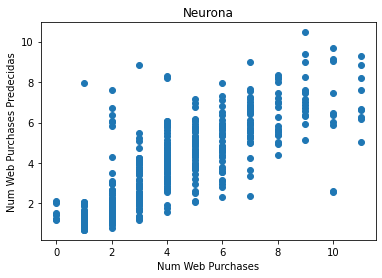

In [67]:
plt.scatter(y_test, y_preds)
plt.xlabel("Num Web Purchases")
plt.ylabel("Num Web Purchases Predecidas")
plt.title("Neurona")
plt.show()

In [68]:
Amse = np.array(listamse)
Ar2s = np.array(listar2s)

dfdata = pd.DataFrame(listaCol)
dfdata['MSE'] = Amse
dfdata['R^2'] = Ar2s
dfdata

,0,MSE,R^2
0,Red 0,2.7310486534748426,0.6044099164142395
1,Red 1,4.076593756602011,0.4095088482339868
2,Red 2,2.408110867766227,0.6511871810663825
3,Red 3,3.224564251460941,0.5329246001750736
4,Red 4,3.2288636933666877,0.5323018296577111
5,Red 5,3.095104825691577,0.5516766883137842
6,Red 6,2.633082591931798,0.6186002174273948
7,Red 7,2.9320794507282733,0.5752907757546206
8,Red 8,2.872069234794467,0.5839832046892164
9,Red 9,3.01022303166983,0.5639717442620731


In [69]:
min = dfdata['MSE'].min()
red = dfdata[dfdata['MSE'] == min]
print("El error más bajo es: ", min)
print("")

red

El error más bajo es:  2.408110867766227



,0,MSE,R^2
2,Red 2,2.408110867766227,0.6511871810663825


In [70]:
#joblib.dump(clasificador, 'finalmodel/clasificador_reg.joblib')

In [72]:
import tensorflow as tf
tf.keras.models.save_model(clasificador2, 'clasificador_reg.joblib')

INFO:tensorflow:Assets written to: clasificador_reg.joblib\assets
